In [1]:
import sys

sys.path.insert(1, '../../src')

from ce import *
from ce.algorithms.greedy_heuristics import *
import random

random.seed(13)

# Greedy heuristics

**Nina Zukowska 148278, Antoni Solarski 148270**

## Algorithms

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa, tspb, tspc, tspd = create_tsp(problem_instance_A_path), create_tsp(problem_instance_B_path), create_tsp(problem_instance_C_path), create_tsp(problem_instance_D_path)

### Random solution

The following pseudocode outlines a random solution generation algorithm for the Traveling Salesman Problem (TSP). The algorithm starts with an empty solution and iteratively selects random unvisited nodes until the desired solution length is reached.

```
# Function to get the next random unvisited node
function get_next_random_node(current_solution, tsp):
    allowable_nodes = [i for i in tsp.indexes if i not in current_solution]
    return random.sample(allowable_nodes, 1)[0]

# Random solution generation for TSP
function random_solution(tsp, with_debug=None):
    k = tsp.get_desired_solution_length()
    solution = []

    while len(solution) < k:
        current_node = get_next_random_node(solution, tsp)
        solution.append(current_node)

    return solution
```

In [4]:
debug = []

In [5]:
%%time
solution = random_solution(tspa, debug)

Wall time: 13.2 ms


In [6]:
tspa.get_solution_cost(solution)

270963

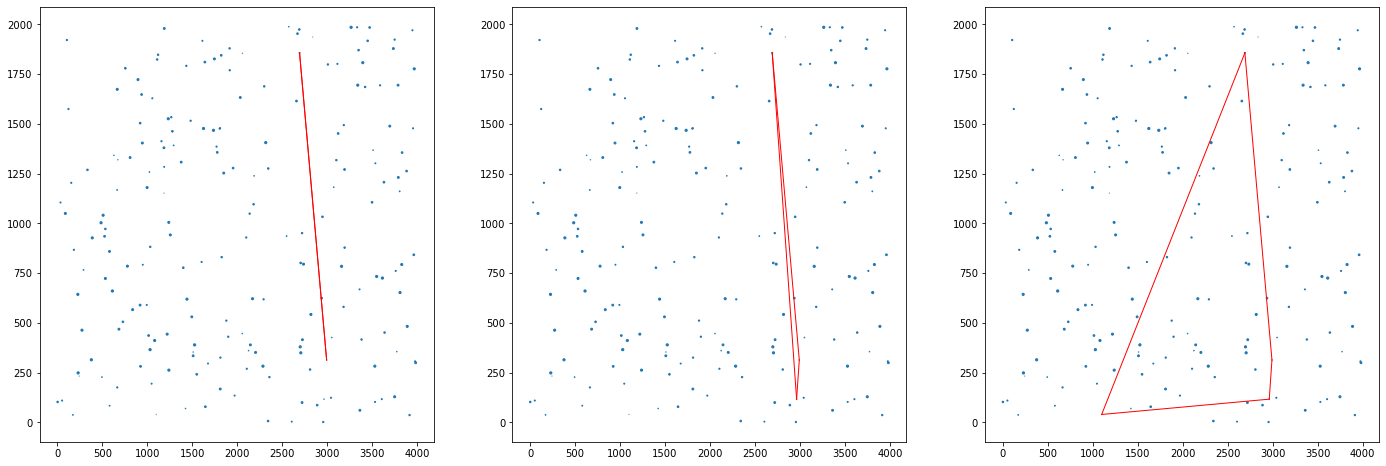

In [7]:
tspa.plot(debug[2:5])

### Nearest neighbor

The following pseudocode outlines the Nearest Neighbor algorithm for generating a solution to the Traveling Salesman Problem (TSP) starting from a given node.

```
# Function to find the nearest unvisited neighbor
function get_nearest_neighbor(current_node, solution, tsp):
    nearest_node = None
    nearest_distance = infinity
    
    for each node in tsp.indexes:
        if node not in solution and tsp.distance(current_node, node) < nearest_distance:
            nearest_node = node
            nearest_distance = tsp.distance(current_node, node)
    
    return nearest_node

# Nearest Neighbor solution for TSP
function nearest_neighbor(tsp, start_node, with_debug=None):
    k = tsp.get_desired_solution_length()
    current_node = start_node
    solution = [start_node]

    while length of solution < k:
        current_node = get_nearest_neighbor(current_node, solution, tsp)
        solution.append(current_node)

    return solution
```

In [8]:
debug = []

In [9]:
%%time
solution = nearest_neighbor(tspa, 0, debug)

Wall time: 20.3 ms


In [10]:
tspa.get_solution_cost(solution)

87429

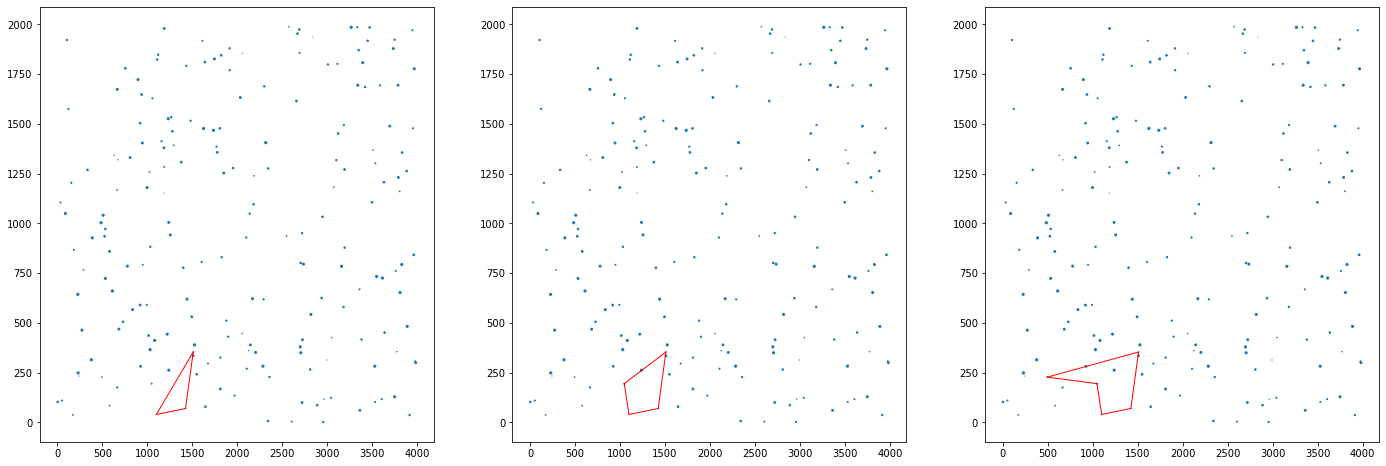

In [11]:
tspa.plot(debug[2:5])

### Greedy cycle

The following pseudocode outlines an algorithm for extending a TSP cycle by adding the cheapest node at each step.

```
# Function to get the cheapest node for an edge in the cycle
function get_cheapest_node_for_edge(edge_start, edge_end, cycle, tsp):
    cheapest_node, min_cost = None, infinity
    
    for each node in tsp.indexes:
        if node not in cycle:
            cost = tsp.distances[edge_start][node] + tsp.nodes[node].cost + tsp.distances[node][edge_end]
            if cost < min_cost:
                cheapest_node = node
                min_cost = cost
                
    return cheapest_node, min_cost

# Function to extend a cycle by the cheapest node
function extend_cycle(cycle, tsp):
    if length of cycle is 1:
        current_node = cycle[0]
        next_node = node with minimum total cost from current_node
        return [current_node, next_node]

    min_cost, min_node, min_edge_idx = infinity, None, None
    for each edge (a, b) in get_edges(cycle):
        cheapest_node, cheapest_node_cost = get_cheapest_node_for_edge(a, b, cycle, tsp)
        if cheapest_node_cost < min_cost:
            min_node = cheapest_node
            min_cost = cheapest_node_cost
            min_edge_idx = index of edge

    Insert min_node at min_edge_idx in cycle
    return cycle

# Greedy Cycle solution for TSP
function greedy_cycle(tsp, start_node, with_debug=None):
    all_nodes = tsp.indexes
    k = tsp.get_desired_solution_length()
    solution = [start_node]

    while length of solution < k:
        solution = extend_cycle(solution, tsp)

    Return solution
```

In [12]:
debug = []

In [13]:
%%time
solution = greedy_cycle(tspa, 0, debug)

Wall time: 1.27 s


In [14]:
tspa.get_solution_cost(solution)

76691

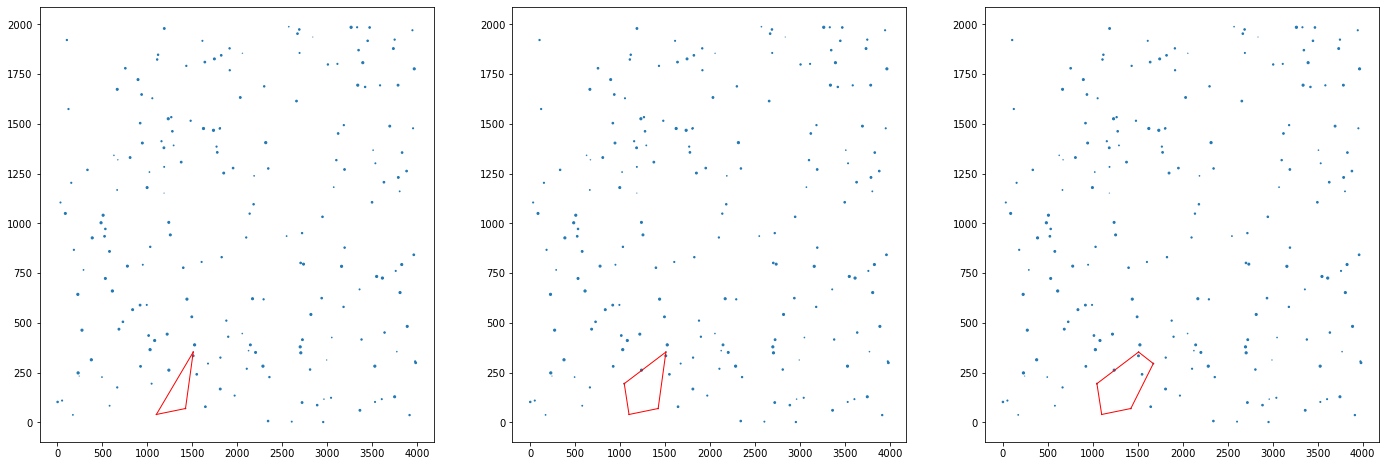

In [15]:
tspa.plot(debug[2:5])

## Experiments

Experiments were performed on all of the instances in order to examine the algorithm behaviour

In [16]:
def experiment(runs, run_fn, cost_fn):
    results, best_solution, best_solution_cost = [], None, 1e9

    for i in range(runs):
        solution = run_fn(i)
        cost = cost_fn(solution)
        results.append(cost)
        if cost < best_solution_cost:
            best_solution = solution
            best_solution_cost = cost

    print(f'MIN {min(results)}, AVG {sum(results) / len(results)}, MAX {max(results)}')
    return results, best_solution

In [17]:
import matplotlib.pyplot as plt
def quality_plots(random_data, neighbor_data, greedy_data):
    data = [random_data, neighbor_data, greedy_data]
    
    # Categories of algorithms examined
    categories = ['Random', 'Neighbor', 'Greedy']


    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    for i, category_data in enumerate(data):
        plt.scatter([i] * len(category_data), category_data, label=categories[i], alpha=0.7)

    # Customize the plot
    plt.xticks(range(len(categories)), categories)
    plt.xlabel('Algorithm')
    plt.ylabel('Performance')
    plt.title('Categorical Scatter Plot')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Instance A

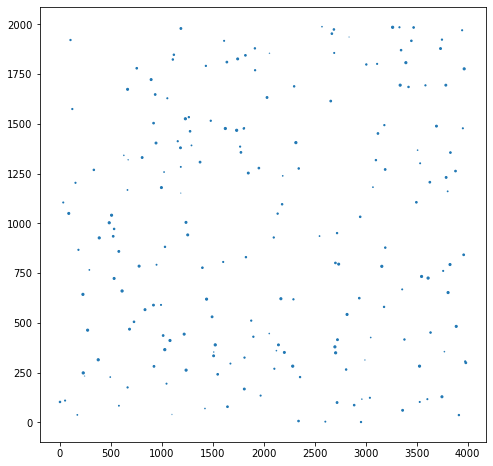

In [18]:
tspa.plot()

In [19]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspa), lambda x: tspa.get_solution_cost(x))

Random solution
MIN 236587, AVG 264914.39, MAX 290340
Wall time: 2.68 s


In [20]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspa, x), lambda x: tspa.get_solution_cost(x))

Nearest neighbor
MIN 84471, AVG 87679.135, MAX 95013
Wall time: 3.58 s


In [21]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspa, x), lambda x: tspa.get_solution_cost(x))

Greedy cycle
MIN 75666, AVG 77076.88, MAX 80321
Wall time: 3min 42s


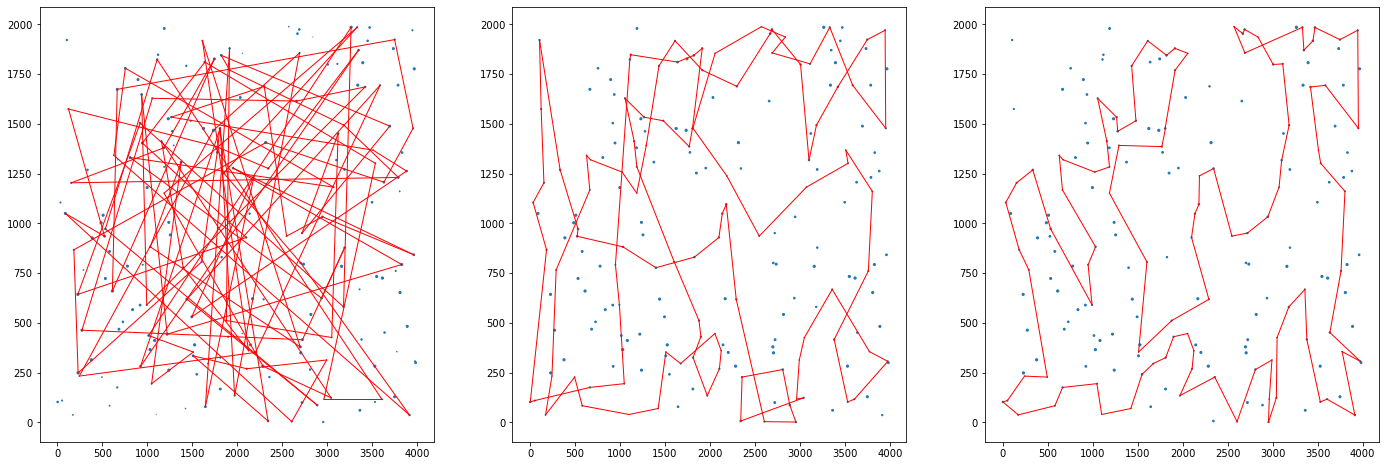

In [22]:
tspa.plot([random_best, nn_best, gc_best])

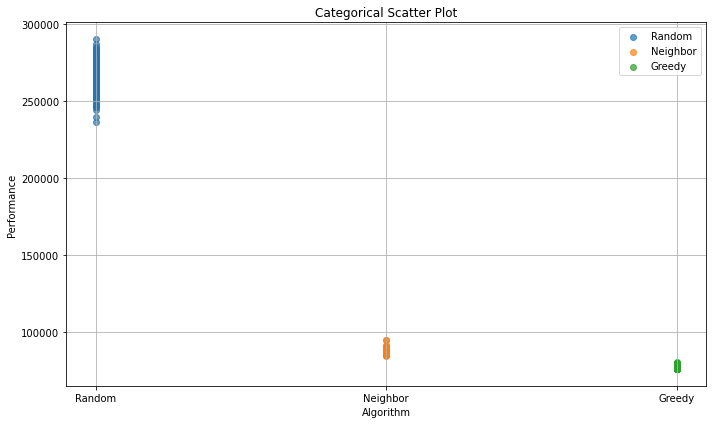

In [23]:
quality_plots(random_results, nn_results, gc_results)

### Instance B

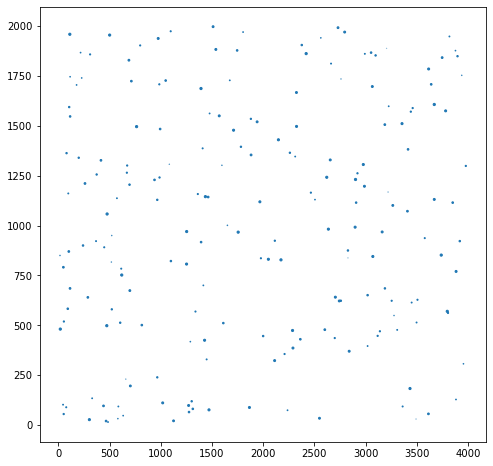

In [24]:
tspb.plot()

In [25]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspb), lambda x: tspb.get_solution_cost(x))

Random solution
MIN 239845, AVG 265712.225, MAX 299886
Wall time: 2.6 s


In [26]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspb, x), lambda x: tspb.get_solution_cost(x))

Nearest neighbor
MIN 77448, AVG 79282.58, MAX 82631
Wall time: 3.36 s


In [27]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspb, x), lambda x: tspb.get_solution_cost(x))

Greedy cycle
MIN 68743, AVG 70727.43, MAX 76324
Wall time: 3min 28s


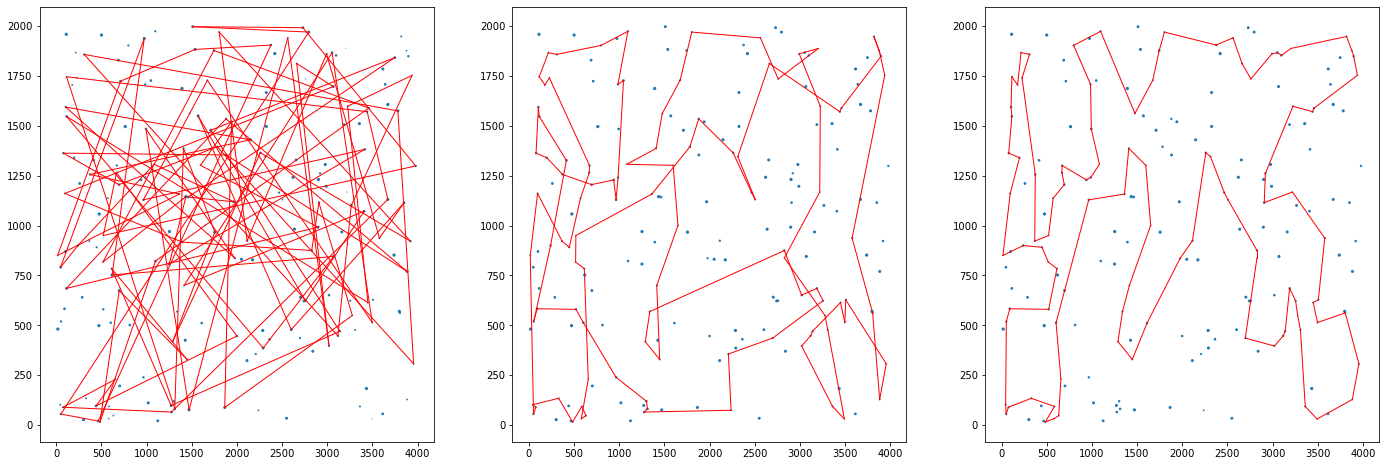

In [28]:
tspb.plot([random_best, nn_best, gc_best])

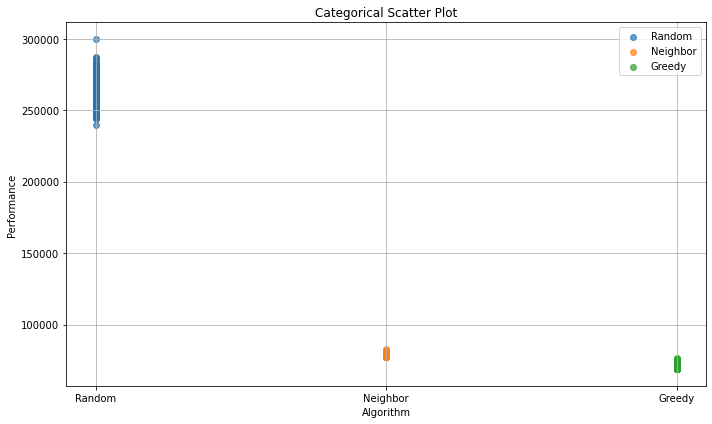

In [29]:
quality_plots(random_results, nn_results, gc_results)

### Instance C

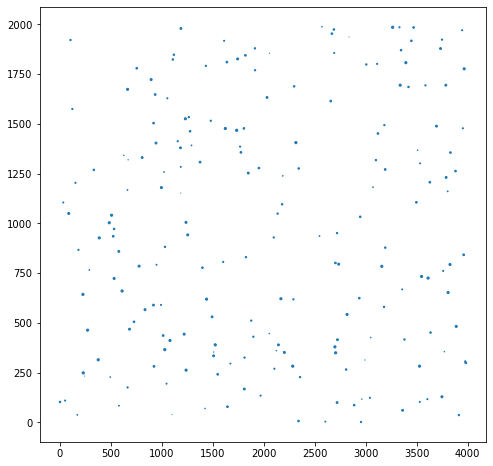

In [30]:
tspc.plot()

In [31]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspc), lambda x: tspc.get_solution_cost(x))

Random solution
MIN 191455, AVG 214811.975, MAX 237507
Wall time: 2.73 s


In [32]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspc, x), lambda x: tspc.get_solution_cost(x))

Nearest neighbor
MIN 56304, AVG 58872.68, MAX 63697
Wall time: 3.44 s


In [33]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspc, x), lambda x: tspc.get_solution_cost(x))

Greedy cycle
MIN 53226, AVG 55839.8, MAX 58876
Wall time: 3min 33s


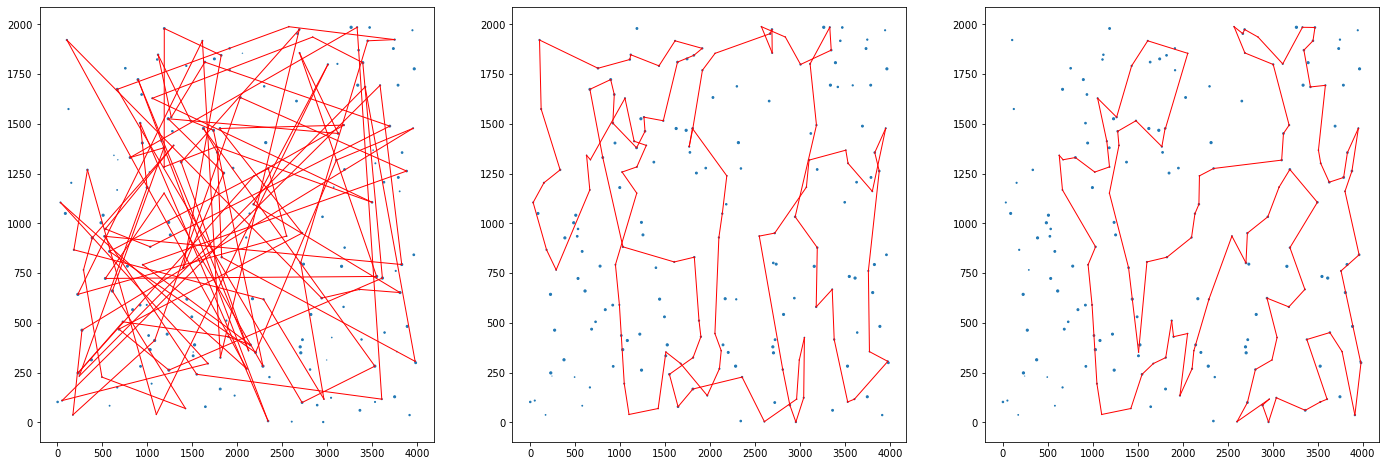

In [34]:
tspc.plot([random_best, nn_best, gc_best])

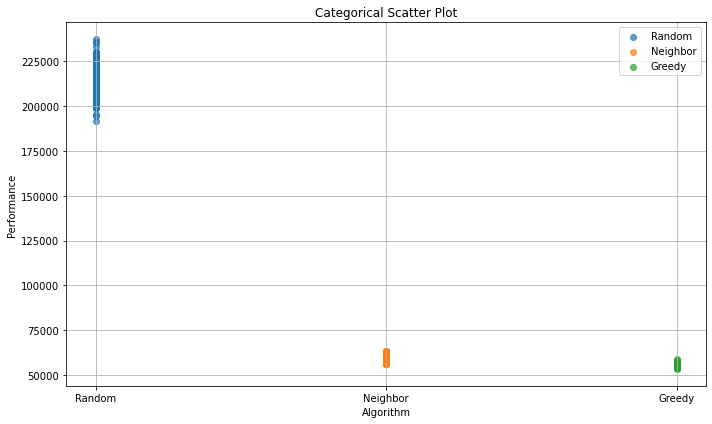

In [35]:
quality_plots(random_results, nn_results, gc_results)

### Instance D

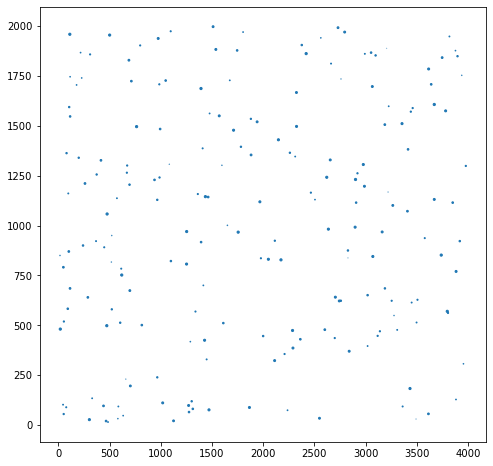

In [36]:
tspd.plot()

In [37]:
%%time
print("Random solution")
random_results, random_best = experiment(200, lambda x: random_solution(tspd), lambda x: tspd.get_solution_cost(x))

Random solution
MIN 196786, AVG 218974.615, MAX 241394
Wall time: 2.76 s


In [38]:
%%time
print("Nearest neighbor")
nn_results, nn_best = experiment(200, lambda x: nearest_neighbor(tspd, x), lambda x: tspd.get_solution_cost(x))

Nearest neighbor
MIN 50335, AVG 54290.68, MAX 59846
Wall time: 3.4 s


In [39]:
%%time
print("Greedy cycle")
gc_results, gc_best = experiment(200, lambda x: greedy_cycle(tspd, x), lambda x: tspd.get_solution_cost(x))

Greedy cycle
MIN 50409, AVG 54832.245, MAX 60964
Wall time: 3min 35s


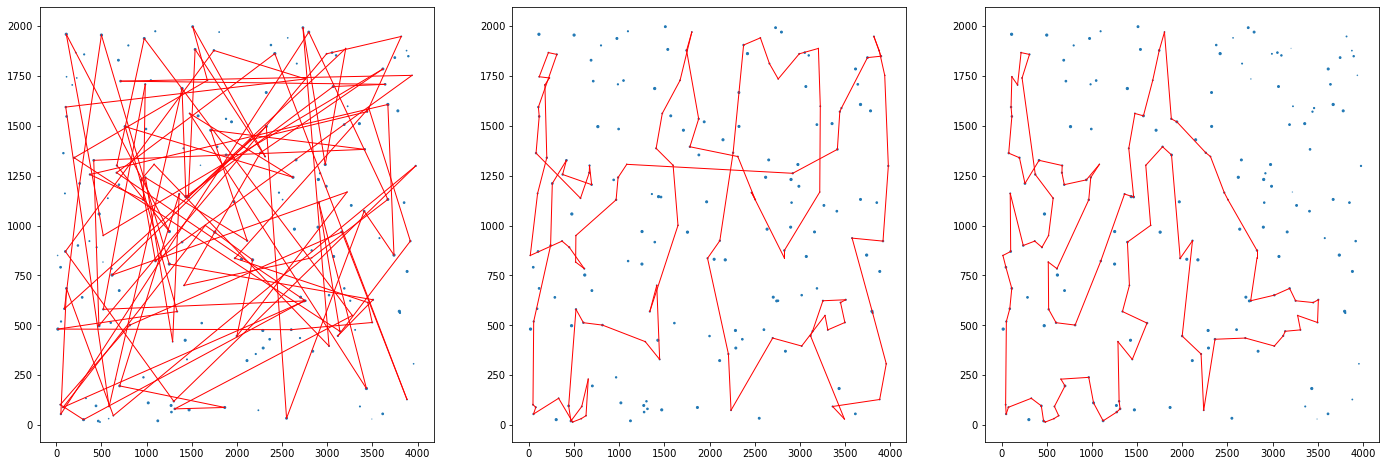

In [40]:
tspd.plot([random_best, nn_best, gc_best])

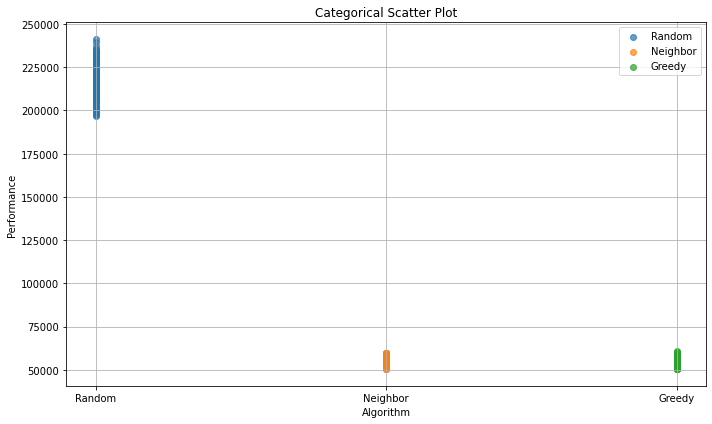

In [41]:
quality_plots(random_results, nn_results, gc_results)

## Conclusions

In the plots above, it's evident that the greedy algorithm consistently achieves the best performance in terms of solution quality. However, it comes at a significant time cost. On my computer, the execution time for the greedy algorithm is quite substantial, often exceeding 2 minutes.

Despite the time-intensive nature of the greedy algorithm, it consistently delivers higher-quality solutions, although in the last two instances the solution quality does not differ too much from the nn algorithm, that might be due to the properties of the examples. The transition from the random algorithm to the nearest neighbor (NN) algorithm results in a substantial improvement in solution quality, and this improvement is achieved with significantly less time overhead. You can clearly see though that  the plots for the nn algorithm differ significantly from the greedy one - that is because of the assumption of the heuristic approach - it picks the NEAREST NEIGHBOR.



link to source code: `https://github.com/Antsol1000/ce`